In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import yfinance as yf 

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']
print(tickers)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


[*********************100%***********************]  1 of 1 completed
['10d_Prev_Close', '10d_Prev_Volume', '10d_200SMA', '10d_MACD', '10d_MACD_signal', '10d_RSI', '10d_RSI_Volume', '10d_upper_band', '10d_lower_band']


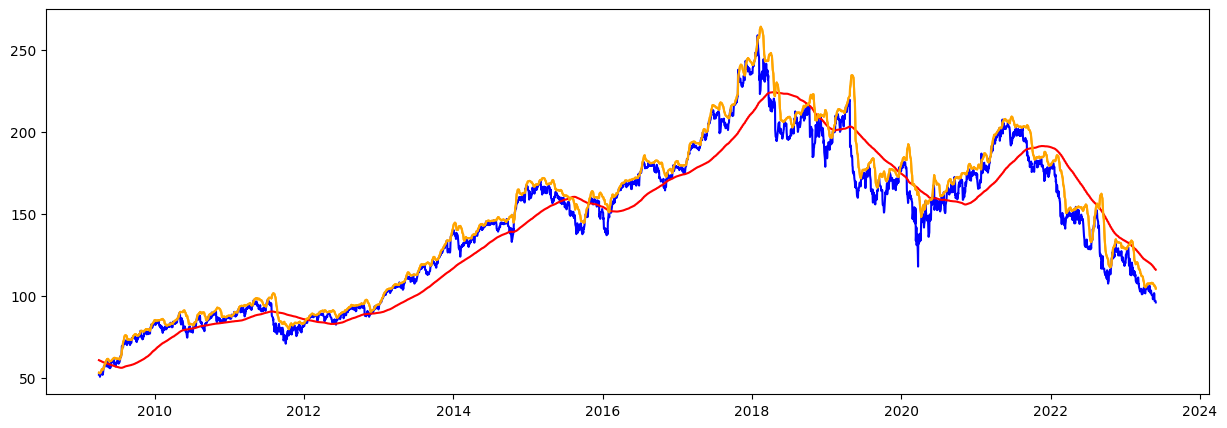

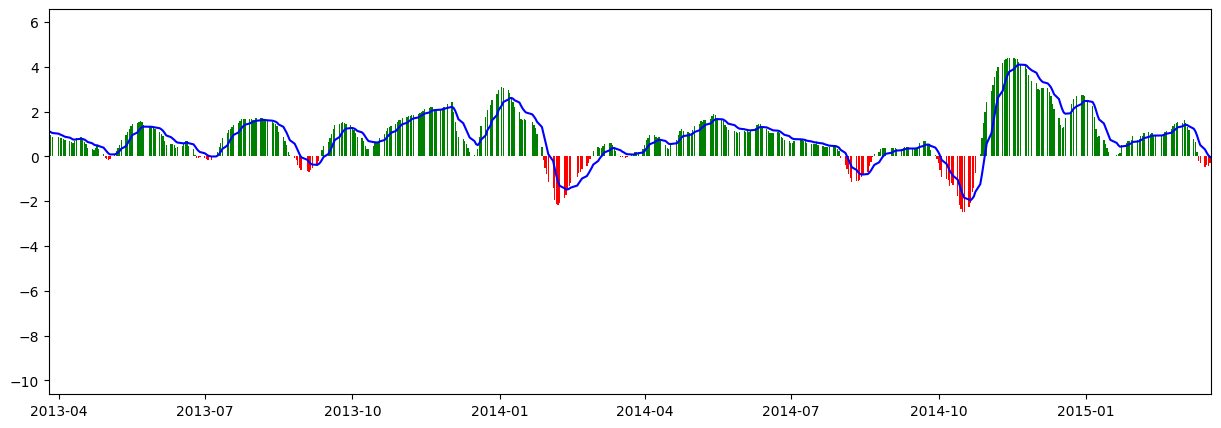

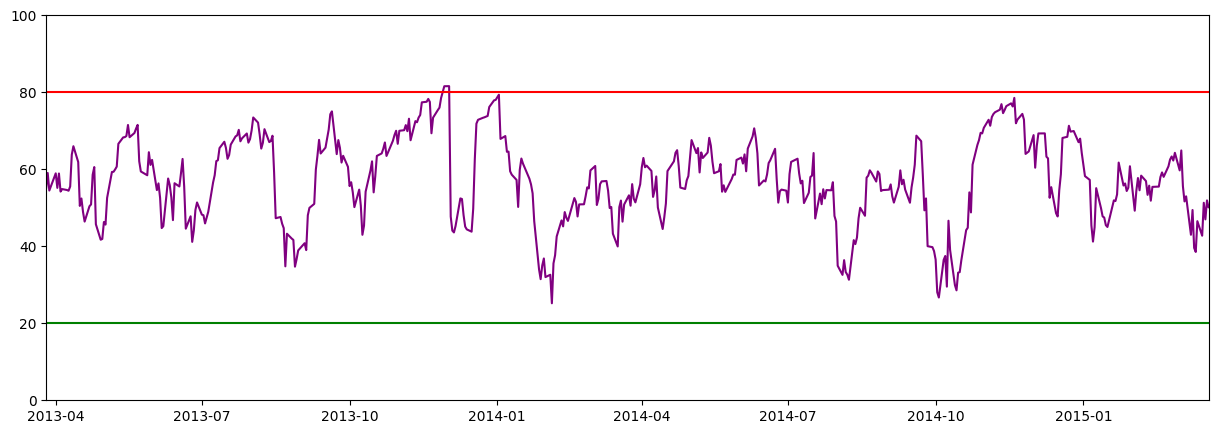

,Open,Close,Volume,Prev_Close,Prev_Volume,Weekday,200SMA,MACD,MACD_signal,RSI,...,5d_lower_band,10d_Prev_Close,10d_Prev_Volume,10d_200SMA,10d_MACD,10d_MACD_signal,10d_RSI,10d_RSI_Volume,10d_upper_band,10d_lower_band
Date,,,,,,,,,,,,,,,,,,,,,
2009-04-03,52.230000,52.110001,4931100,52.130001,6961000.0,4,60.91600,0.749904,0.186855,60.187521,...,0.027316,0.098167,-0.004676,-0.021097,-2.434378,-1.141702,0.215746,0.011355,0.056860,0.056860
2009-04-06,52.000000,52.080002,3885300,52.110001,4931100.0,0,60.80505,0.903813,0.330247,60.115250,...,0.016661,0.134553,-0.418187,-0.020485,-2.585293,-1.282517,0.339522,-0.151643,0.058333,0.058333
2009-04-07,51.509998,50.799999,4060600,52.080002,3885300.0,1,60.69485,1.011704,0.466538,59.998878,...,0.009015,0.055961,-0.477677,-0.020036,-4.063266,-1.465975,0.093299,-0.147095,0.042296,0.042296
2009-04-08,50.930000,51.380001,4089300,50.799999,4060600.0,2,60.58375,0.982596,0.569750,55.097802,...,0.005179,0.051760,-0.182106,-0.019728,-5.467284,-1.674293,0.063015,-0.013771,0.039177,0.039177
2009-04-09,52.610001,53.130001,5753900,51.380001,4089300.0,3,60.47585,0.994861,0.654772,56.819051,...,0.000849,0.048144,-0.478851,-0.019348,-14.520560,-1.948006,0.056462,-0.153995,0.035937,0.035937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,100.449997,96.989998,4132600,100.699997,3616200.0,2,117.02660,-1.164195,-1.174830,45.456090,...,-0.012479,-0.000992,0.158519,-0.017618,0.528971,1.655460,0.176276,0.041954,-0.015038,-0.015038
2023-05-25,96.550003,97.050003,3119600,96.989998,4132600.0,3,116.76915,-1.380573,-1.215978,36.235433,...,-0.007497,-0.038751,0.505995,-0.018411,0.548477,1.284600,-0.072531,0.116152,-0.015117,-0.015117
2023-05-26,97.050003,96.940002,2785200,97.050003,3119600.0,4,116.51520,-1.529581,-1.278699,36.459933,...,-0.009441,-0.037011,0.124585,-0.018897,0.540446,1.047919,-0.058429,0.012828,-0.017871,-0.017871


In [37]:
def calc_macd(data, len1, len2, len3):
    shortEMA = data.ewm(span = len1, adjust = False).mean()
    longEMA = data.ewm(span = len2, adjust = False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span = len3, adjust = False).mean()
    return MACD, signal

def calc_rsi(data, period):
    delta = data.diff()
    up = delta.clip(lower = 0)
    down = -1 * delta.clip(upper = 0)
    ema_up = up.ewm(com = period,adjust = False).mean()
    ema_down = down.ewm(com = period,adjust = False).mean()
    rs = ema_up / ema_down
    rsi = 100 - (100/(1+rs))
    return rsi

def calc_bollinger(data,period):
    mean = data.rolling(period).mean()
    std = data.rolling(period).std()
    upper_band = np.array(mean) + 2* np.array(std)
    lower_band = np.array(mean) + 2* np.array(std)
    return upper_band, lower_band
    
    
    
    

    



for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15*365)
    
    history = yf.download(ticker,start=start_date, end = end_date, interval='1d', prepost=False)
    history = history.loc[:,['Open', 'Close','Volume']]
    
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    
    datetimes =  history.index.values
    weekdays = []
    
    for dt in datetimes:
        
              
        
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        
        weekdays.append(dt.weekday()) 
    
    
    history['Weekday'] = weekdays
    

    history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
    MACD, signal = calc_macd(history['Prev_Close'], 12,26,9)
    history['MACD'] = MACD
    history['MACD_signal'] = signal
    
    history['RSI'] = calc_rsi(history['Prev_Close'], 13)
    history['RSI_Volume'] = calc_rsi(history['Prev_Volume'], 13)
    
    upper, lower = calc_bollinger(history['Prev_Close'], 20)
    history['upper_band'] = upper
    history['lower_band'] = lower
    
    
    
    
    
    labels = ['Prev_Close','Prev_Volume','200SMA','MACD','MACD_signal','RSI','RSI_Volume','upper_band','lower_band']
    
    period = 1
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period,fill_method = 'ffill')
    
    period = 2
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period,fill_method = 'ffill')
    
    
    period = 5
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period,fill_method = 'ffill')
    
    
    
    period = 10
    new_labels = [str(period) + 'd_' + label for label in labels]
    history[new_labels] = history[labels].pct_change(period,fill_method = 'ffill')
    print(new_labels)
    
    history = history.replace(np.inf,np.nan).dropna()
    
    
    
    
    
    x = history.index.values
    
    plt.figure(figsize=(15,5)) 
    plt.plot(x,history['Prev_Close'], color = 'blue')
    plt.plot(x, history['200SMA'], color = 'red')
    plt.plot(x, history['upper_band'], color = 'orange')
    plt.plot(x, history['lower_band'], color = 'orange')
    plt.show()
    
    plt.figure(figsize=(15,5))
    colors = np.array(['green']*len(history['MACD']))
    colors[history['MACD']<0] = 'red'
    plt.bar(x,history['MACD'], color = colors)
    plt.plot(x,history['MACD_signal'], color = 'blue')
    plt.xlim(x[1000],x[1500])
    plt.show()
    
    plt.figure(figsize=(15,5))
    plt.plot(x,history['RSI'], color = 'purple')
    plt.plot([x[0], x[-1]], [80,80], color = 'red')
    plt.plot([x[0], x[-1]], [20,20], color = 'green')
    plt.xlim(x[1000],x[1500])
    plt.ylim(0,100)
    plt.show()
    
    display(history)


    
    
    
    

MMM


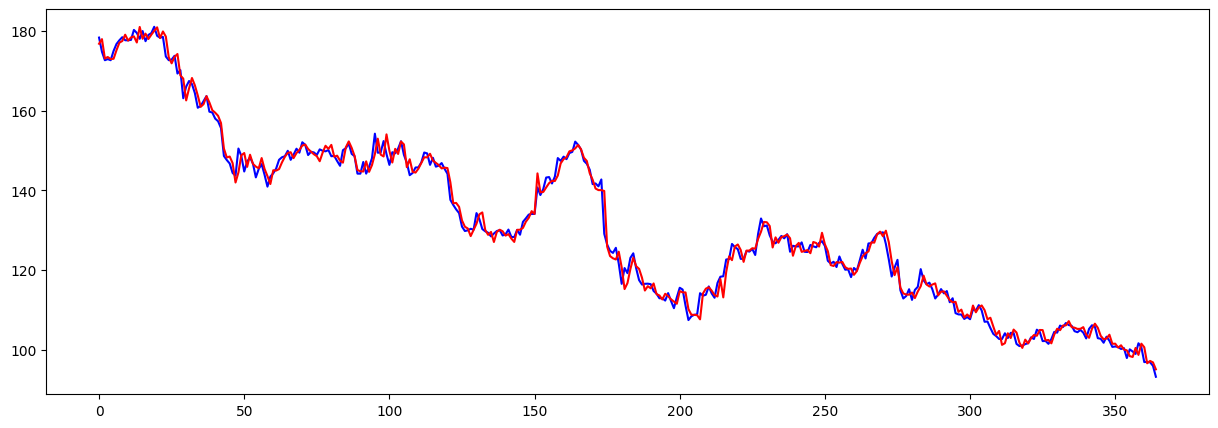

In [42]:
from sklearn.linear_model import LinearRegression

y = history['Close']
x = history.drop(['Close', 'Volume'], axis = 1).values

num_test = 365

x_train = x[:-1*num_test]
y_train = y[:-1*num_test]
x_test = x[-1*num_test:]
y_test = y[-1*num_test:]

model = LinearRegression()
model = model.fit(x_train,y_train)
preds = model.predict(x_test)

print(ticker)
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test,'blue')
plt.plot(range(len(preds)), preds, 'red')

plt.show()



